In [1]:
# 1. Questions-Answers, do we want this format?
# 2. Change some variables names to something more specifying and in the style of python?

In [2]:
import os
import scipy.io
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

### 1. Tissue parameters 

Load T1, T2, and PD:

In [4]:
#Paths for data
mri_data_path = os.getcwd() + '/data/mri_data/'

In [5]:
#Load T1, T2, and PD

T1 = scipy.io.loadmat(mri_data_path+'T1.mat')['T1']
T2 = scipy.io.loadmat(mri_data_path+'T2.mat')['T2']
PD = scipy.io.loadmat(mri_data_path+'PD.mat')['PD']

In [6]:
# Check their sizes

print(T1.shape)
print(T2.shape)
print(PD.shape)

(181, 217, 181)
(181, 217, 181)
(181, 217, 181)


Let's pick an axial slice and show it:

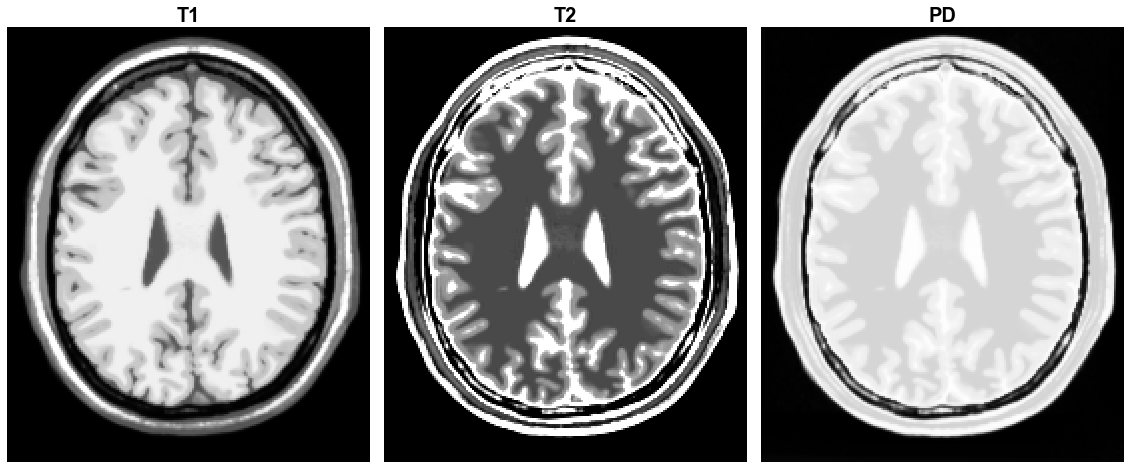

In [6]:
z = 99

#Plot it
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=[20,10])
fig.subplots_adjust(wspace=0.04)

#T1
ax0 = axes[0].imshow(np.flipud(np.transpose(PD[:,:,z])/np.transpose(T1[:,:,z])), cmap='Greys_r')
ax0.set_clim(0, 0.0015) 
axes[0].set_title('T1', fontsize = 20, fontweight='bold', fontname='Arial')
axes[0].axis('off')

#T2
ax1 = axes[1].imshow(np.flipud(np.transpose(T2[:,:,z])), cmap='Greys_r')
ax1.set_clim(50, 120) 
axes[1].set_title('T2', fontsize = 20, fontweight='bold', fontname='Arial')
axes[1].axis('off')

#PD
ax2 = axes[2].imshow(np.flipud(np.transpose(PD[:,:,z])), cmap='Greys_r')
axes[2].set_title('PD', fontsize = 20, fontweight='bold', fontname='Arial')
axes[2].axis('off')

plt.show()

### 2.  T2 Decay

Pick a point somewhere in the brain:

In [7]:
x = 84
y = 124
z = 99

And then compute the transverse magnetization as a function of time after a 90-degree pulse:

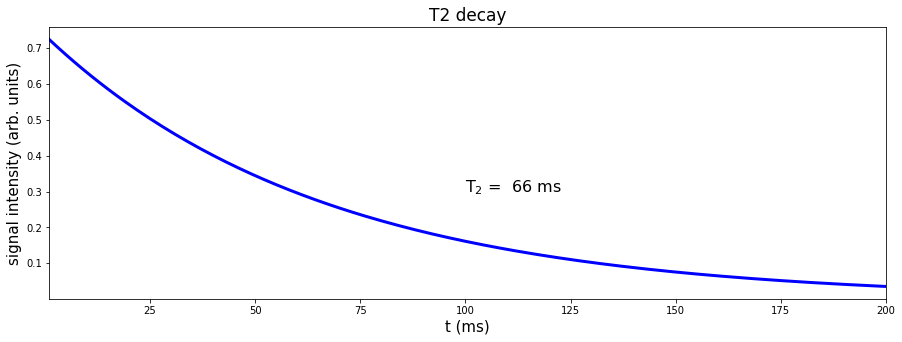

In [8]:
t = np.arange(1,201) #in ms
mxy = PD[x,y,z] * np.exp(-t/T2[x,y,z])

#Plot it
plt.figure(figsize=(15,5))
plt.plot(t, mxy, 'b', lw=3)
plt.xlim(t[0],t[-1])
plt.text(t[-1]/2, 0.3, "$\mathregular{T_2}$ = %3d ms"% (np.round(T2[x,y,z])), fontsize='16')
plt.title('T2 decay', fontsize=17)
plt.xlabel('t (ms)', fontsize=15)
plt.ylabel('signal intensity (arb. units)', fontsize=15)
plt.show()

### 3. T1 Recovery

Pick a point somewhere in the brain

In [9]:
x = 84
y = 124 
z = 99

Compute the longitudinal magnetization as a function of time after a 90-degree pulse

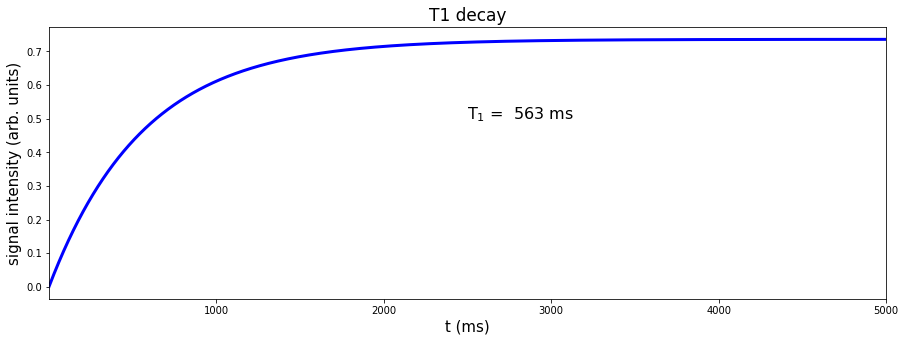

In [10]:
t = np.arange(1,5001) #in ms
mz = PD[x,y,z] * (1-np.exp(-t/T1[x,y,z]))

#Plot it
plt.figure(figsize=(15,5))
plt.plot(t, mz, 'b', lw=3)
plt.xlim(t[0],t[-1])
plt.text(t[-1]/2, 0.5, "$\mathregular{T_1}$ = %4d ms"% (np.round(T1[x,y,z])), fontsize='16')
plt.title('T1 decay', fontsize=17)
plt.xlabel('t (ms)', fontsize=15)
plt.ylabel('signal intensity (arb. units)', fontsize=15)
plt.show()

### 3. T2 Weighted Imaging Sequence

Spin Echo sequence <br>
Repeat [90-TE/2-180-TE/2-READ] every TR <br>
There are two knobs, TE and TR. <br>


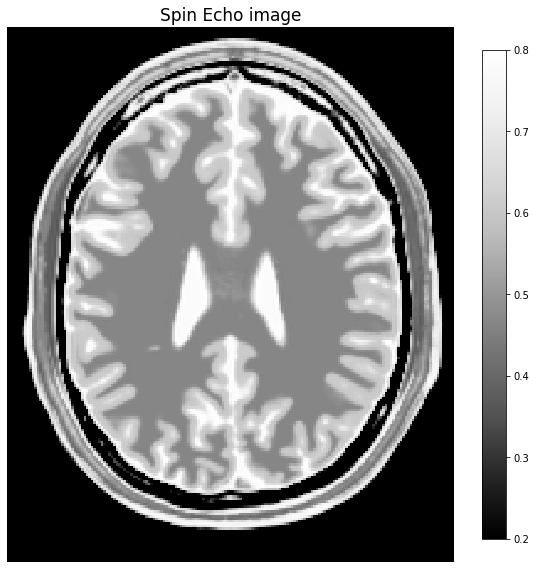

In [11]:
TR = 5000   # in ms
TE = 30   # in ms
M = PD[:,:,z]*(1-np.exp(-TR/T1[:,:,z]))*np.exp(-TE/T2[:,:,z])

#Plot it
plt.figure(figsize=(10,10))
plt.imshow(np.rot90(M), cmap='Greys_r')
plt.clim(0.2, 0.8) 
plt.axis('off')
plt.colorbar(shrink=0.9)
plt.title('Spin Echo image', fontsize =17)
plt.show()

<div class="alert alert-info" role="alert">
  <strong>Question 1</strong> <br>
    Play with TE (holding TR constant), and try to increase the contrast between gray and white matter.<br>
How could you optimize the constrast to noise ratio?
</div>

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer here.
</div>

### 4. T1 Weighted Imaging Sequence

FLASH Sequence <br>
Repeat [FA-TE-READ] every TR <br>
There are two knobs TR and flip angle (FA)

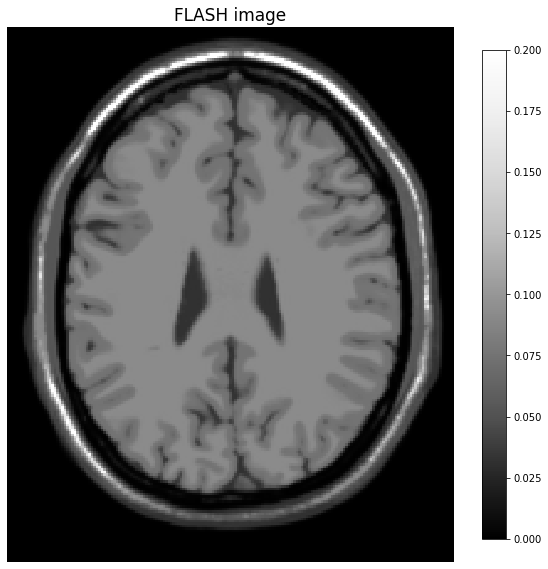

In [12]:
TR = 40  # in ms
FA = 50  # in degrees
TE = 3   # e.g. as short as the scanner will let you
M = PD[:,:,z]*(1-np.exp(-TR/T1[:,:,z]))/(1-np.cos(FA/180*np.pi)*np.exp(-TR/T1[:,:,z]))*np.sin(FA/180*np.pi)*np.exp(-TE/T2[:,:,z])

#Plot it
plt.figure(figsize=(10,10))
plt.imshow(np.rot90(M), cmap='Greys_r')
plt.clim(0, 0.2) 
plt.axis('off')
plt.colorbar(shrink=0.9)
plt.title('FLASH image', fontsize =17)
plt.show()

<div class="alert alert-info" role="alert">
  <strong>Question 2</strong> <br>
    Play with FA (holding TR constant), and with TR (holding FA constant). <br>
    Try to increase the contrast between gray and white matter.<br>
How could you optimize the constrast to noise ratio?
</div>

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer here.
</div>

### 5. 1D Image Acquisition and Reconstruction

This is a 1-D example. <br>

First, get a line (along x) of the image:<br>
Use the middle line of the image, and a spin echo sequence.

In [13]:
y = 108 
z = 99

TR = 5000 
TE = 50
M = PD[:,y,z]*(1-np.exp(-TR/T1[:,y,z]))*np.exp(-TE/T2[:,y,z])

Keep an even number of points:

In [14]:
if len(M)%2==1:
     M = M[:-1]

To simulate a real object, interpolate the magnetization to a much higher resolution (a real object is a continuum).

In [15]:
Nx = 2**10   #1025 points

Go to Fourier space:

In [16]:
fM = np.fft.fftshift(np.fft.fft(M))

Filter it a bit, to eliminate ringing:

In [17]:
fMf = fM * signal.hann(len(fM))    # filtered Fourier transform

Pad it with zeros:

In [38]:
fMi = np.zeros((Nx), dtype = 'complex_')
fMi[int((Nx-len(M))/2)+np.arange(0,len(M))] = fMf  #so that (Nx/2+1) is the peak

Go back to image space:

In [39]:
Mi = np.abs(np.fft.ifft(np.fft.fftshift(fMi)))

#### Now, "acquire" the data and reconstruct it:

Generate a sampling grid in k-space:

In [41]:
kx = np.arange(-32,33)     # maximum value of k is 32
Nk = len(kx)

Generate the locations of the pixels in real space <br>
This is in units of Field of View, i.e., the leftmost pixel is at -FOV/2

In [42]:
x = (np.arange(-Nx/2, Nx/2))/Nx

#### The magnetization

Compute the signal:

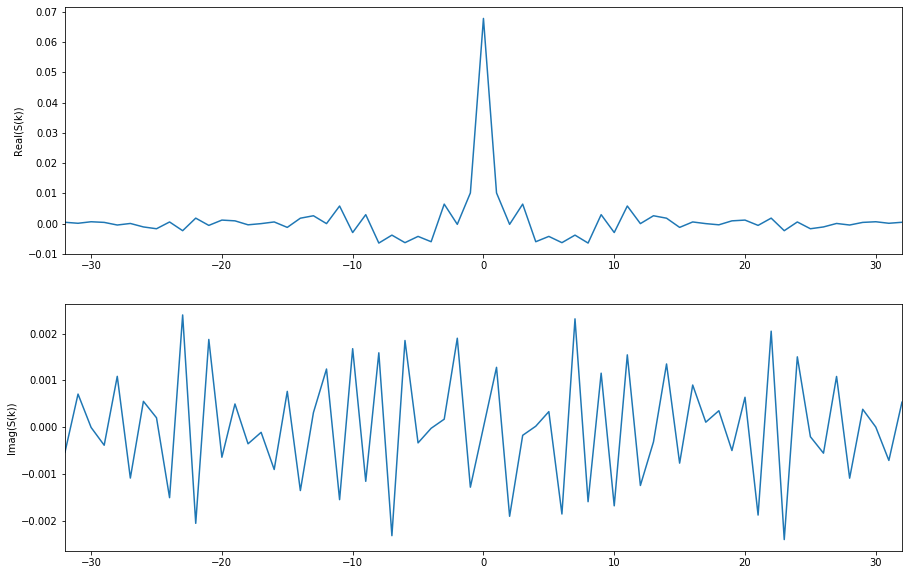

In [43]:
s = np.zeros(Nk, dtype = 'complex_')
for m in range (Nk): 
    s[m] = np.sum(Mi*np.exp(2*np.pi*1j*kx[m]*x))/Nx  # this is a discretized form of the integral equation

# Plot it in k-space
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=[15,10])

# Real part
axes[0].plot(kx,np.real(s))
axes[0].set_xlim(kx[0], kx[-1])
axes[0].set_ylabel('Real(S(k))')

# Imaginary part
axes[1].plot(kx,np.imag(s))
axes[1].set_xlim(kx[0], kx[-1])
axes[1].set_ylabel('Imag(S(k))')

plt.show()

Now reconstruct the image using the inverse DFT:

In [44]:
R = np.zeros(len(x))

for m in range (1,Nk):
    R = R + s[m]*np.exp(-2*np.pi*1j*kx[m]*x)

Take the absolute value

In [45]:
R = np.abs(R)

How good is the reconstruction?

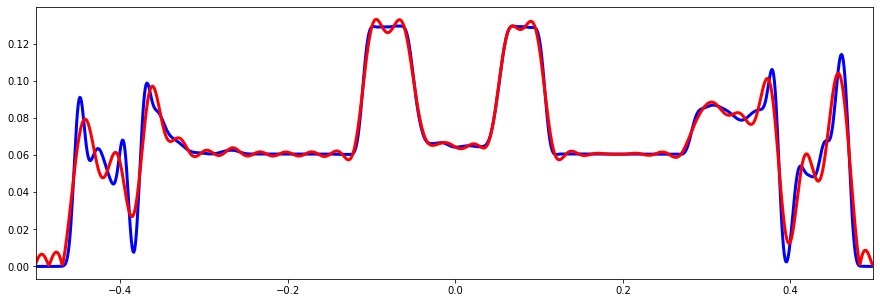

In [47]:
#Plot it

plt.figure(figsize=(15,5))
plt.plot(x, Mi, 'b', lw=3)
plt.plot(x, R, 'r', lw=3)
plt.xlim(x[0], x[-1])
plt.show()

### 6. 2D Image Acquisition and Reconstruction

Do the above 2-D<br>
Set up a grid of points in kx and ky and write a for loop. (see np.meshgrid) <br>

Generate a sampling grid in k-space, keeping the x/y ratio constant and equal to the one in the original image (this is not necessary, but the images don't look distorted):

In [48]:
Km = 32
r = PD.shape[1]/PD.shape[0]
Kxm = np.floor(Km*r);  # maximum value of Kx
Kym = Km     # maximum value of Ky
ky,kx = np.meshgrid(np.arange(-Kym, Kym+1), np.arange(-Kxm,Kxm+1))
Nkx = kx.shape[0]
Nky = kx.shape[1]

Generate the locations of the pixels in real space<br>
This is in units of Field of View, i.e., the leftmost pixel is at -FOV/2

In [49]:
Nx = PD.shape[0]
Ny = PD.shape[1]
y,x = np.meshgrid(np.linspace(-0.5,0.5,Ny), np.linspace(-0.5,0.5,Nx))

The magnetization along the transverse plane at t=TE: <br>
Use one of the slices in the middle of the head.

In [50]:
z= 99

Use a spin echo sequence; assume instant readout (i.e., no decay during readout):

In [51]:
TR = 5000 
TE = 50
M = PD[:,:,z]*(1-np.exp(-TR/T1[:,:,z]))*np.exp(-TE/T2[:,:,z])

Compute the signal (this is slow):

In [52]:
s = np.zeros((Nkx,Nky), dtype='complex_')
for n in range (Nky):
    for m in range (Nkx):
        s[m,n] = np.sum(np.sum(M*np.exp(2*np.pi*1j*(kx[m,n]*x+ky[m,n]*y))))/(Nx*Ny)   # this is a discretized form of the integral equation

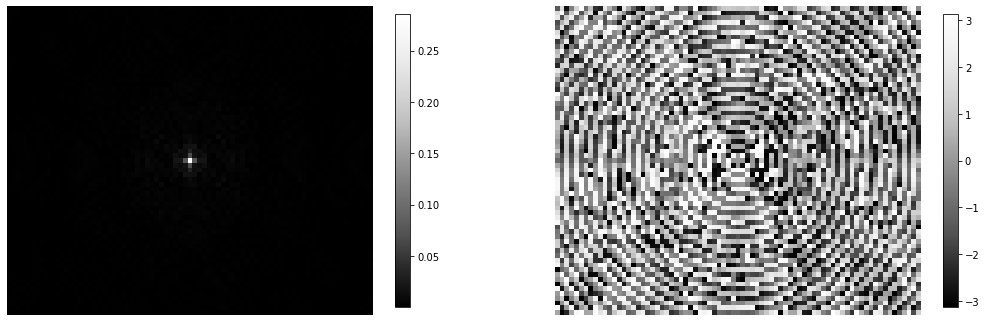

In [53]:
# Plot it in k-space
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[18,18])

# Magnitude
ax0 = axes[0].imshow(np.abs(np.rot90(s)), cmap='Greys_r')
axes[0].axis('off')
fig.colorbar(ax0, ax=axes[0], shrink=0.3)

# Agle
ax1 = axes[1].imshow(np.angle(np.rot90(s)), cmap='Greys_r')
axes[1].axis('off')
fig.colorbar(ax1, ax=axes[1], shrink=0.3)

plt.show()

<div class="alert alert-info" role="alert">
  <strong>Tip</strong> <br>
    To see more detail in the abs(s) plot, try using <code>np.log(np.abs(np.rot90(s)))</code>.
</div>

#### Reconstruction

Generate the reconstruction grid (same resolution as the acquisition):

In [54]:
yr,xr = np.meshgrid(np.linspace(-0.5,0.5,Nkx), np.linspace(-0.5,0.5,Nky))

Reconstruct the image using the inverse DFT:

In [55]:
R = np.zeros(xr.shape, dtype='complex_')
for n in range (Nky):
    for m in range (Nkx):
        R = R + s[m,n]*np.exp(-2*np.pi*1j*(kx[m,n]*xr+ky[m,n]*yr))

Take the absolute value

In [56]:
R = np.abs(R)

How good is the reconstruction?

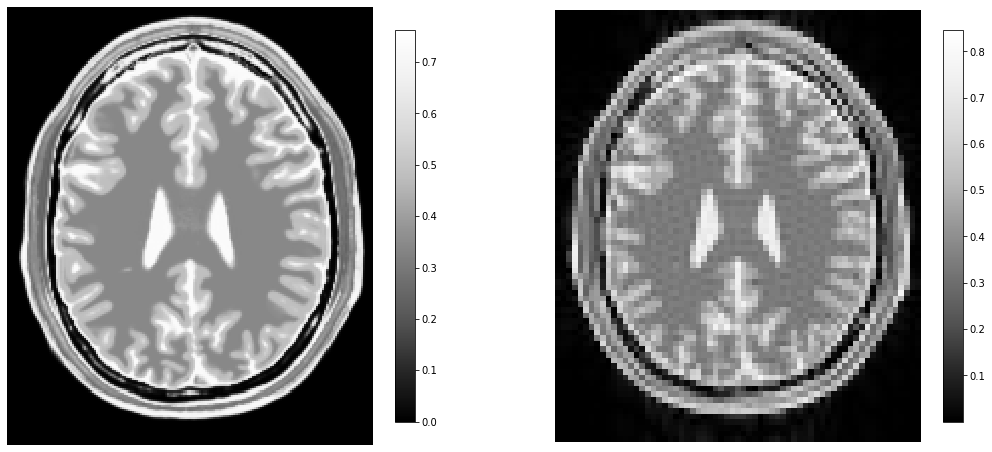

In [57]:
# Plot it 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[18,18])

ax0 = axes[0].imshow(np.rot90(M), cmap='Greys_r')
axes[0].axis('off')
fig.colorbar(ax0, ax=axes[0], shrink=0.4)

ax1 = axes[1].imshow(np.rot90(R), cmap='Greys_r')
axes[1].axis('off')
fig.colorbar(ax1, ax=axes[1], shrink=0.4)

plt.show()

<div class="alert alert-info" role="alert">
  <strong>Question 3</strong> <br>
    Why is there ringing? <br> Tip: Try increasing the "resolution": Kxm, Kym
</div>

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer here.
</div>

### 7. EPI readout

Now we will include decay during the readout (from one ky line to the next). <br>

Imagine we have a GRadient Echo (GRE) image (used for BOLD contrast). The decay rate in the transverse plane should be T2* . However, since we don't have it, we'll use T2 for this exercise. An EPI readout collects all of k-space in one shot. The total readout time is of the same order of magnitude as T2\* (tens of mili-seconds), so we cannot assume instant readout and we'll have T2* decay througout the readout.

Load B0:

In [74]:
B0 = scipy.io.loadmat(mri_data_path+'B0.mat')['B0']  # B0 is in units of 1/ms!

es = 0.5  # echo-spacing, in ms. (typical for the Prisma @ 2 mm voxels) 

tstart = TE - (Nky-1)/2*es;   # beginning of the readout, in ms.

# make sure you have enough time to collect Nky/2 lines before the echo:
if tstart<0:
    raise Exception('Error: You need to increase your TE by at least %d ms.',np.ceil(-tstart))
    
z=51  # pick a little more interesting slice

The magnetization from each voxel at the beginning of the readout:

In [75]:
M0 = PD[:,:,z]*(1-np.exp(-TR/T1[:,:,z]))*np.exp(-tstart/T2[:,:,z])

The decay in the signal from one line of the readout to the next:

In [76]:
d = np.exp(-es/T2[:,:,z]+1j*B0[:,:,z]*es)

Km = 48
r = PD.shape[1]/PD.shape[0]
Kxm = np.floor(Km*r);  # maximum value of Kx
Kym = Km     # maximum value of Ky
ky,kx = np.meshgrid(np.arange(-Kym, Kym+1), np.arange(-Kxm,Kxm+1))
Nkx = kx.shape[0]
Nky = kx.shape[1]

Compute the signal:

In [77]:
sT2 = np.zeros((Nkx,Nky), dtype='complex_')
for n in range (Nky):
    for m in range (Nkx):
        sT2[m,n] = np.sum(np.sum(M0*(d**(n-1))*np.exp(2*np.pi*1j*(kx[m,n]*x+ky[m,n]*y))))/(Nx*Ny) # this is a discretized form of the integral equation

The signal in k-space:

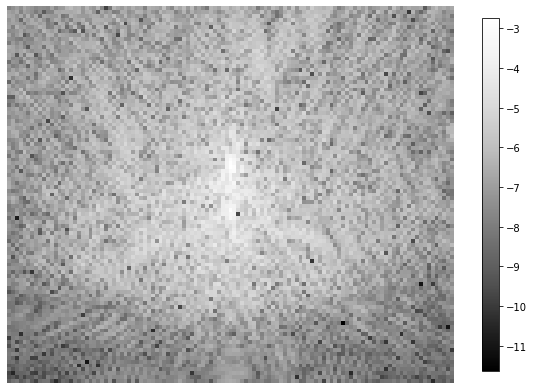

In [78]:
plt.figure(figsize=(10,10))
plt.imshow(np.rot90((np.log(np.abs(sT2)))), cmap='Greys_r')
plt.axis('off')
plt.colorbar(shrink=0.65)
plt.show()

Reconstruct the image using the inverse DFT:

In [79]:
RT2 = np.zeros(xr.shape, dtype='complex_')
for n in range (Nky):
    for m in range (Nkx):
        RT2 = RT2 + sT2[m,n]*np.exp(-2*np.pi*1j*(kx[m,n]*xr+ky[m,n]*yr))

Take the absolute value:

In [80]:
RT2 = np.abs(RT2)

How good is the reconstruction?

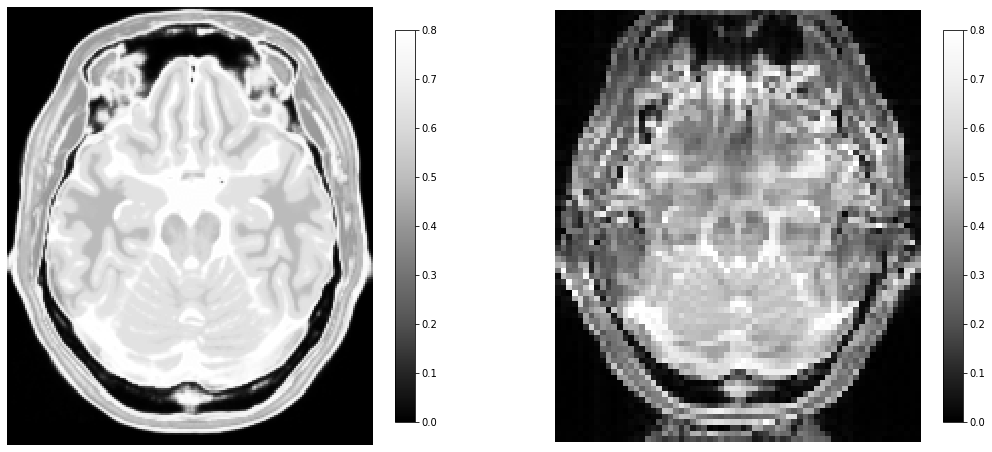

In [81]:
# Plot it 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=[18,18])

ax0 = axes[0].imshow(np.rot90(M0), cmap='Greys_r')
axes[0].axis('off')
ax0.set_clim(0, 0.8) 
fig.colorbar(ax0, ax=axes[0], shrink=0.4)

ax1 = axes[1].imshow(np.rot90(RT2), cmap='Greys_r')
axes[1].axis('off')
ax1.set_clim(0, 0.8) 
fig.colorbar(ax1, ax=axes[1], shrink=0.4)

plt.show()

<div class="alert alert-info" role="alert">
  <strong>Question 4</strong> <br>
    What happens if you increase your echo spacing, say to 0.75 ms.?
</div>

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer here.
</div>

<div class="alert alert-info" role="alert">
  <strong>Question 5</strong> <br>
    Repeat the same calculations with reversed phase encoding (change the sign of B0 in the expression for "d")
</div>

<div class="alert alert-info" role="alert">
  <strong>Question 6</strong> <br>
     What happens if you change the phase encoding direction to right-to-left? (in the generation of the signal sT2, replace the exponent for d from (n-1) to (m-1).  That will effectively change the decay (and phase) when you take a step in kx, not in ky).

</div>

<div class="alert alert-warning" role="alert">
  <strong>Your Answer</strong> <br>
  Delete this text and put your answer here.
</div>

##### Note that we are using T2 instead of T2\*.  In Orbito-Frontal Cortex T2* is much, much shorter than T2, so the effects would be even larger.